<a href="https://colab.research.google.com/github/among5094/Big-Data-Integrated-Analysis/blob/main/week05_CH05_%EC%8B%9C%EA%B0%81%ED%99%94_%EB%9D%BC%EC%9D%B4%EB%B8%8C%EB%9F%AC%EB%A6%AC2/5week_CH05_%EC%8B%9C%EA%B0%81%ED%99%94_%EB%9D%BC%EC%9D%B4%EB%B8%8C%EB%9F%AC%EB%A6%AC2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CH05 시각화 라이브러리(2)

날짜: 4월 07일 월요일( 5주차 )

## 5.1 시본(Seaborn) 라이브러리의 개요

이론들... 교재 보기

## 5.2 시본 라이브러리

### 5.1.(1) 데이터 준비하기

In [1]:
# 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# 외부데이터 이용하기 - 엑셀 파일 불러오기
data = pd.read_excel('/content/drive/MyDrive/data/05_data1.xlsx')
data

,no,city_code,gender,age_code,height,weight,waist,systolic,diastolic,blood_sugar,cholesterol,triglycerides,HDL,LDL,hemoglobin,serum,smoking,drinking
0,1,36,1,9,165,60,72.1,127,79,90,188,58,58.0,118,15.0,1.1,1,0
1,5,41,2,12,155,50,75.2,144,89,110,220,171,53.0,133,12.4,0.7,1,0
2,6,27,1,9,185,85,94.0,114,72,86,234,183,50.0,147,16.4,1.1,3,1
3,7,44,1,9,165,80,93.0,112,73,250,119,265,26.0,40,15.7,0.7,3,1
4,9,41,2,17,150,50,82.0,136,65,104,177,61,63.0,101,13.3,0.7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,7648,31,2,11,155,55,68.0,132,82,97,198,60,80.0,106,10.6,0.9,1,1
2996,7650,42,1,13,155,60,79.0,123,68,90,157,122,46.0,86,15.0,0.8,1,0
2997,7651,41,1,9,165,60,85.0,118,81,81,100,55,46.0,43,15.1,0.8,1,0
2998,7652,42,1,9,180,90,97.0,148,90,101,235,232,43.0,145,16.6,0.7,1,1


data.loc[행조건, 열선택]

**DataFrame.loc[행 조건, 열 선택] = 새로운 값**

In [10]:
# 2020년 건강검진 정보에서 성별, 음주 여부, 흡연 상태에 따라 데이터 처리

# 모든 데이터 중에 6개의 데이터만 받기(성별,키,몸무게,허리둘레,음주여부,흡연여부)
data6 = data.loc[:,['gender','height','weight', 'waist','drinking','smoking']]
print("data6 가공 전: ")
print(data6)

# 성별 정보 가공하기
data6.loc[data6['gender']==1,['gender']]='Male' # data6에서 gender 값이 1인 행들의 gender 값을 'Male'로 바꾸기
data6.loc[data6['gender']==2,['gender']]='Female'

# 음주 여부 데이터 가공하기
data6.loc[data6['drinking']==0, ['drinking']]='Non-drinking' #
data6.loc[data6['drinking']==1, ['drinking']]='Drinking' #

# 흡연 상태 데이터 가공하기
data6.loc[data6['smoking']==1,['smoking']]='Non-smoking' # 비흡연자
data6.loc[data6['smoking']==2,['smoking']]='Quit-smoking' # 금연자
data6.loc[data6['smoking']==3,['smoking']]='Smoking' # 흡연자


data6 가공 전: 
      gender  height  weight  waist  drinking  smoking
0          1     165      60   72.1         0        1
1          2     155      50   75.2         0        1
2          1     185      85   94.0         1        3
3          1     165      80   93.0         1        3
4          2     150      50   82.0         0        1
...      ...     ...     ...    ...       ...      ...
2995       2     155      55   68.0         1        1
2996       1     155      60   79.0         0        1
2997       1     165      60   85.0         0        1
2998       1     180      90   97.0         1        1
2999       1     160      65   89.8         1        2

[3000 rows x 6 columns]


<ipython-input-10-e66729a75c79>:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Male' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data6.loc[data6['gender']==1,['gender']]='Male' # data6에서 gender 값이 1인 행들의 gender 값을 'Male'로 바꾸기
<ipython-input-10-e66729a75c79>:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Non-drinking' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data6.loc[data6['drinking']==0, ['drinking']]='Non-drinking' #
<ipython-input-10-e66729a75c79>:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Non-smoking' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data6.loc[data6['smoking']==1,['smoking']]='No

In [11]:
# 데이터 가공 후 보기
print("data6 가공 후: ")
print(data6)

data6 가공 후: 
      gender  height  weight  waist      drinking       smoking
0       Male     165      60   72.1  Non-drinking   Non-smoking
1     Female     155      50   75.2  Non-drinking   Non-smoking
2       Male     185      85   94.0      Drinking       Smoking
3       Male     165      80   93.0      Drinking       Smoking
4     Female     150      50   82.0  Non-drinking   Non-smoking
...      ...     ...     ...    ...           ...           ...
2995  Female     155      55   68.0      Drinking   Non-smoking
2996    Male     155      60   79.0  Non-drinking   Non-smoking
2997    Male     165      60   85.0  Non-drinking   Non-smoking
2998    Male     180      90   97.0      Drinking   Non-smoking
2999    Male     160      65   89.8      Drinking  Quit-smoking

[3000 rows x 6 columns]


### 5.2.(2) 시본 막대 그래프

In [12]:
# 성별과 음주 상태별로 그룹화하여 각 그룹의 개수(count) 계산
drinking = data6.groupby(['gender', 'drinking'])['drinking'].count()
print(drinking)


gender  drinking    
Female  Drinking         611
        Non-drinking     888
Male    Drinking        1086
        Non-drinking     415
Name: drinking, dtype: int64


In [22]:
# 성별과 음주 상태별로 그룹화하여 각 그룹의 개수(count) 계산
drinking = data6.groupby(['gender', 'drinking'])['drinking'].count()
print("drinking에 count 적용한 것: \n")
print(drinking)

# 성별과 흡연 상태별로 그룹화하여 각 그룹의 개수(count) 계산
smoking = data6.groupby(['gender', 'smoking'])['smoking'].count()
print("\n smoking에 count 적용한 것: \n")
print(smoking)


drinking에 count 적용한 것: 

gender  drinking    
Female  Drinking         611
        Non-drinking     888
Male    Drinking        1086
        Non-drinking     415
Name: drinking, dtype: int64

 smoking에 count 적용한 것: 

gender  smoking     
Female  Non-smoking     1422
        Quit-smoking      45
        Smoking           32
Male    Non-smoking      502
        Quit-smoking     519
        Smoking          480
Name: smoking, dtype: int64


In [23]:
# 현재 시리즈 형식임. 그래서 결과를 DataFrame으로 변환하고 'count'라는 컬럼 이름 지정
drinking = drinking.to_frame(name='count')
smoking = smoking.to_frame(name='count')

**reset_index()는 왜 하는가?**  

1.   groupby()를 쓰면 인덱스가 바뀐다. 계층형 인덱스(MultiIndex)가 만들어짐.
2.   이런 계층형 인덱스는 시각화, 엑셀로 저장, 컬럼 선택할 때 불편하다.
3.



In [24]:

print(drinking.index)
print(drinking.head())
print(drinking.columns)

# 인덱스를 일반 열로 변환
drinking = drinking.reset_index()
smoking = smoking.reset_index()
print(drinking.index)

MultiIndex([('Female',     'Drinking'),
            ('Female', 'Non-drinking'),
            (  'Male',     'Drinking'),
            (  'Male', 'Non-drinking')],
           names=['gender', 'drinking'])
                     count
gender drinking           
Female Drinking        611
       Non-drinking    888
Male   Drinking       1086
       Non-drinking    415
Index(['count'], dtype='object')
RangeIndex(start=0, stop=4, step=1)


기본 막대 그래프 그리기

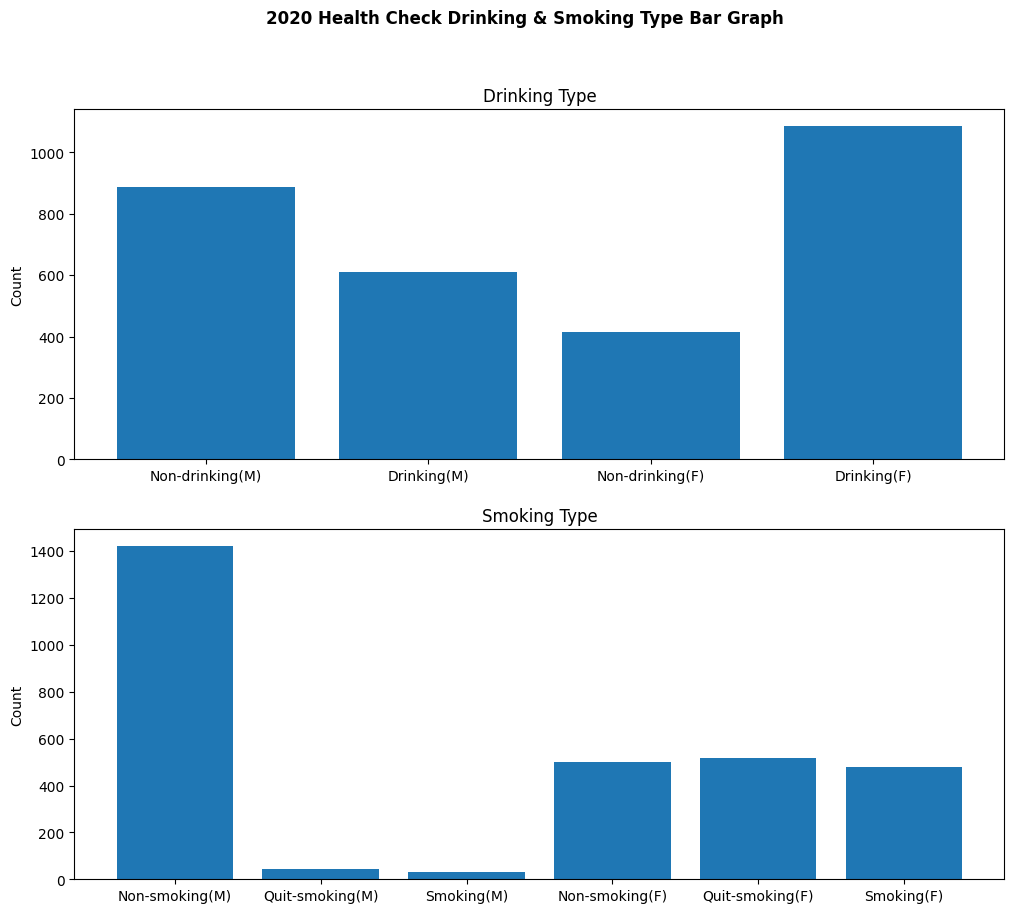

In [ ]:
# 그림 전체 생성 (가로 12, 세로 10 크기)
fig = plt.figure(figsize=(12, 10))

# 전체 그래프의 제목 설정 (굵은 글씨)
fig.suptitle('2020 Health Check Drinking & Smoking Type Bar Graph', fontweight='bold')

# x축 위치를 위한 인덱스 배열 생성
index1 = np.arange(4) # 음주 항목용 (4개)
index2 = np.arange(6) # 흡연 항목용 (6개)

# 첫 번째 서브플롯 추가 (2행 1열의 첫 번째 자리)
fig.add_subplot(2, 1, 1)  # (행, 열, 위치) - 2행 1열의 첫 번째
plt.bar(index1, drinking['count'])  # 막대그래프 그리기 (음주 데이터)
plt.title('Drinking Type')  # 서브 타이틀
plt.ylabel('Count')  # y축 이름
plt.xticks(index1, ['Non-drinking(M)', 'Drinking(M)', 'Non-drinking(F)', 'Drinking(F)'])  # x축 라벨 설정

# 두 번째 서브플롯 추가 (2행 1열의 두 번째 자리)
fig.add_subplot(2, 1, 2) #  - 2행 1열의 두 번째
plt.bar(index2, smoking['count'])  # 막대그래프 그리기 (흡연 데이터)
plt.title('Smoking Type')  # 서브 타이틀
plt.ylabel('Count')  # y축 이름
plt.xticks(index2, ['Non-smoking(M)', 'Quit-smoking(M)', 'Smoking(M)',
                    'Non-smoking(F)', 'Quit-smoking(F)', 'Smoking(F)'])  # x축 라벨 설정

# 그래프 보여주기
plt.show()


시본 막대 그래프 그리기

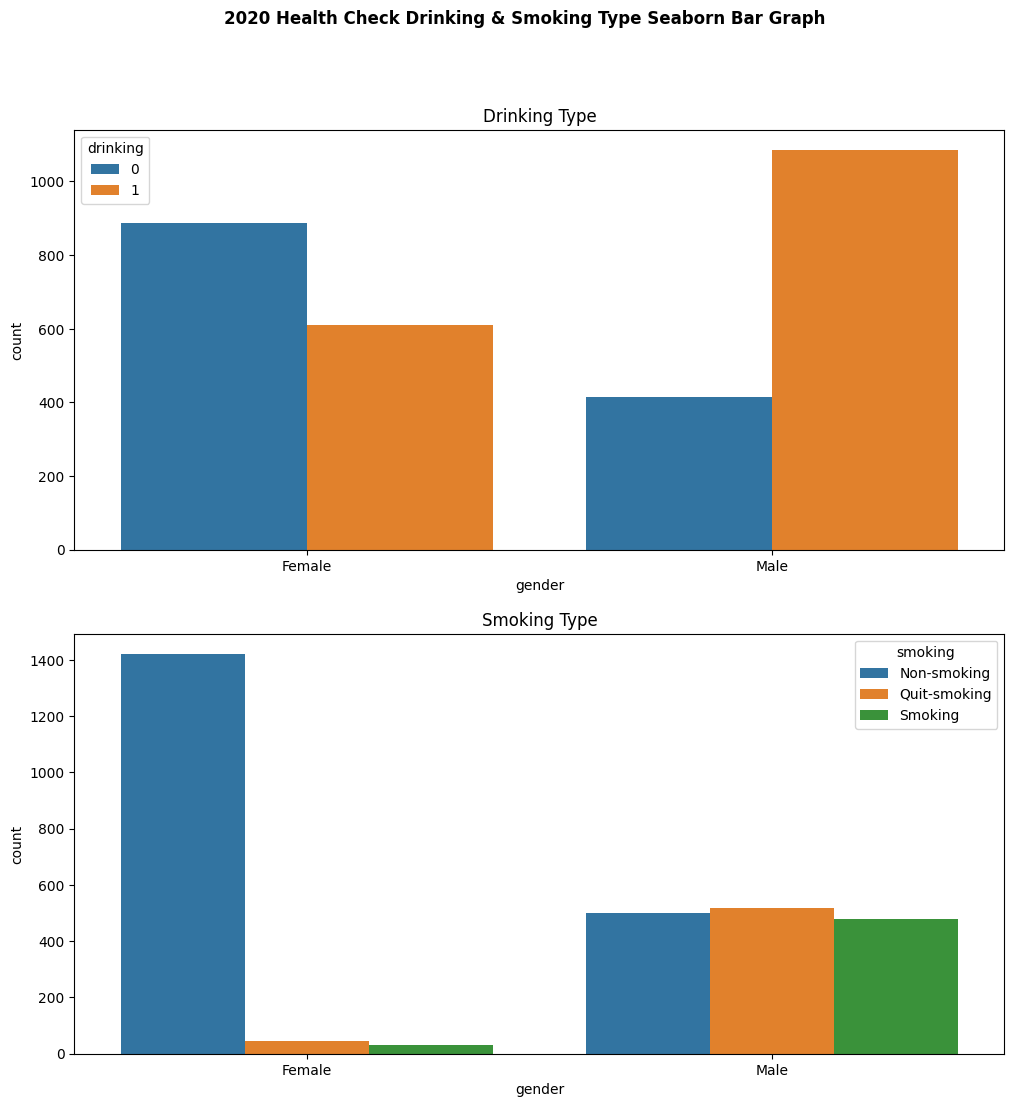

In [ ]:
# 그래프
fig = plt.figure(figsize=(12,12)) # inch단위

area1 = fig.add_subplot(2, 1, 1) # 2 by1의 첫 번째 인덱스 (음주)
area2 = fig.add_subplot(2, 1, 2) # 2 by1의 첫 번째 인덱스 (흡연)

# 성별(gender)과 음주(drinking) 정보를 바탕으로 막대그래프 생성
ax1 = sns.barplot(x='gender', y='count', hue='drinking', data=drinking, ax=area1)

# 성별(gender)과 흡연(smoking) 정보를 바탕으로 막대그래프 생성
ax2 = sns.barplot(x='gender', y='count', hue='smoking', data=smoking, ax=area2)

# 전체 그래프 제목
fig.suptitle('2020 Health Check Drinking & Smoking Type Seaborn Bar Graph', fontweight='bold')

# 서브 그래프 각각의 제목
area1.set_title('Drinking Type')
area2.set_title('Smoking Type')

# 그래프 출력
plt.show()


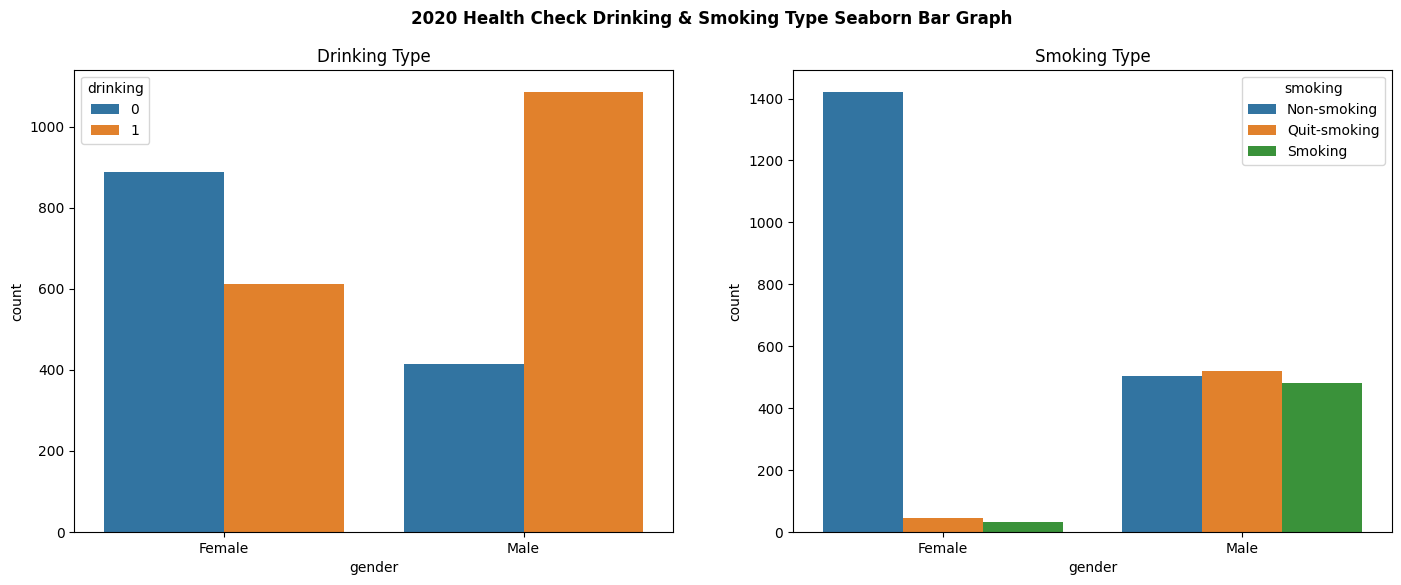

In [ ]:
# 그래프 크기
fig = plt.figure(figsize=(17,6)) # inch단위

area1 = fig.add_subplot(1, 2, 1) # 하나의 행을 두 열로 나눔 (음주)
area2 = fig.add_subplot(1, 2, 2) #  (흡연)

# 성별(gender)과 음주(drinking) 정보를 바탕으로 막대그래프 생성
ax1 = sns.barplot(x='gender', y='count', hue='drinking', data=drinking, ax=area1)

# 성별(gender)과 흡연(smoking) 정보를 바탕으로 막대그래프 생성
ax2 = sns.barplot(x='gender', y='count', hue='smoking', data=smoking, ax=area2)

# 전체 그래프 제목
fig.suptitle('2020 Health Check Drinking & Smoking Type Seaborn Bar Graph', fontweight='bold')

# 서브 그래프 각각의 제목
area1.set_title('Drinking Type')
area2.set_title('Smoking Type')

# 그래프 출력
plt.show()


##### 5.2.(3) 시본 산점도 그래프

In [ ]:
maledata = data6.loc[data6.gender == 'M', ['gender', 'height', 'weight', 'waist', 'drinking', 'smoking']]
femaledata = data6.loc[data6.gender == 'F', ['gender', 'height', 'weight', 'waist', 'drinking', 'smoking']]

<ipython-input-26-239101f63c7e>:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Gender')  # 범례 추가


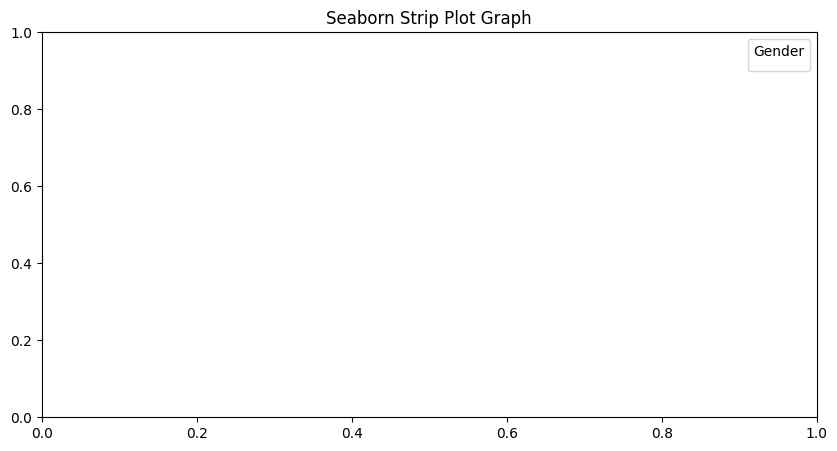

In [ ]:
plt.figure(figsize=(10, 5))
plt.title('Seaborn Strip Plot Graph')

sns.stripplot(x='height', y='weight', data=maledata)
sns.stripplot(x='height', y='weight', data=femaledata)

plt.show()

<ipython-input-28-e2918e83dd49>:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Gender')


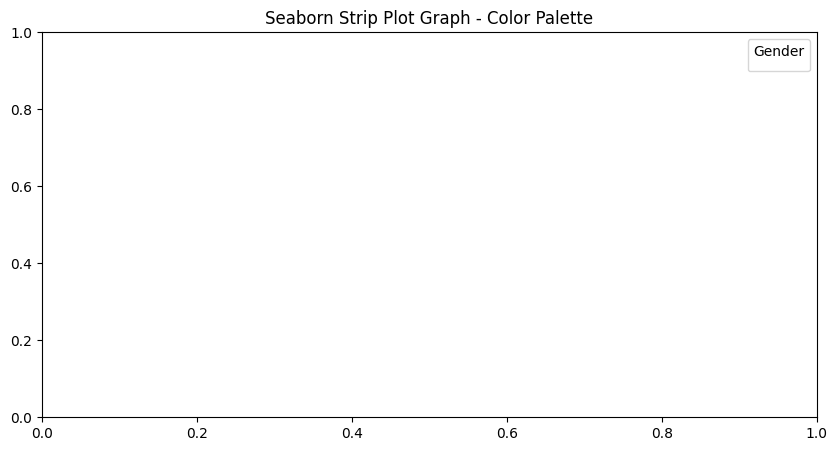

In [ ]:
# 남녀 데이터 합치기
combined_data = pd.concat([maledata, femaledata])

# 스트립 플롯 그리기
plt.figure(figsize=(10, 5))
plt.title('Seaborn Strip Plot Graph - Color Palette')

sns.stripplot(x='height', y='weight', hue='gender', data=combined_data, palette='Set2', jitter=True)

plt.legend(title='Gender')
plt.show()


<ipython-input-29-d3e2d7c46f57>:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Gender')


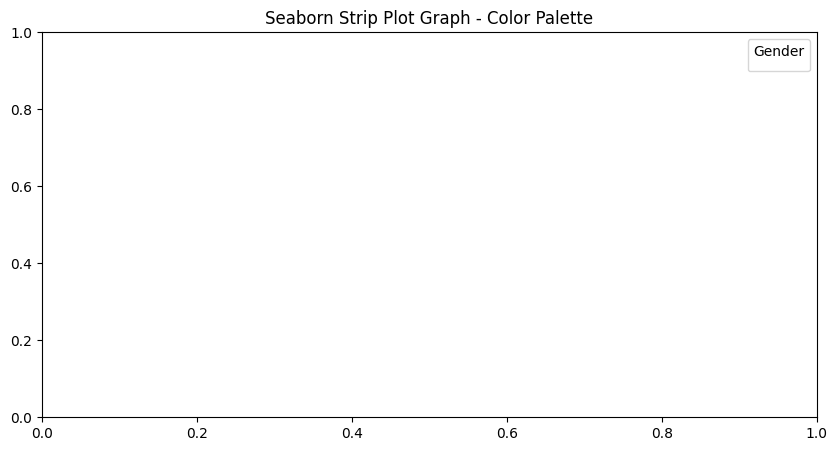

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 남녀 데이터 합치기
combined_data = pd.concat([maledata, femaledata])

# 그래프 그리기
plt.figure(figsize=(10, 5))
plt.title('Seaborn Strip Plot Graph - Color Palette')

sns.stripplot(x='height', y='weight', hue='gender', data=combined_data, palette='Set1', jitter=True)

plt.legend(title='Gender')
plt.show()


In [ ]:
# 데이터가 비어 있는지 확인하기
print(combined_data.head())
print(combined_data.columns)
print(combined_data[['gender', 'height', 'weight']].isnull().sum())

Empty DataFrame
Columns: [gender, height, weight, waist, drinking, smoking]
Index: []
Index(['gender', 'height', 'weight', 'waist', 'drinking', 'smoking'], dtype='object')
gender    0
height    0
weight    0
dtype: int64


In [ ]:
# 원인: 문자열이 'M', 'F'가 아니라서 안 걸림
print(data6['gender'].unique())


['Male' 'Female']


In [ ]:
# 여자 데이터와 남자 데이터를 실제 올바른 이름으로 바꾸니까 됨.
maledata = data6.loc[data6.gender == 'Male', ['gender', 'height', 'weight', 'waist', 'drinking', 'smoking']]
femaledata = data6.loc[data6.gender == 'Female', ['gender', 'height', 'weight', 'waist', 'drinking', 'smoking']]

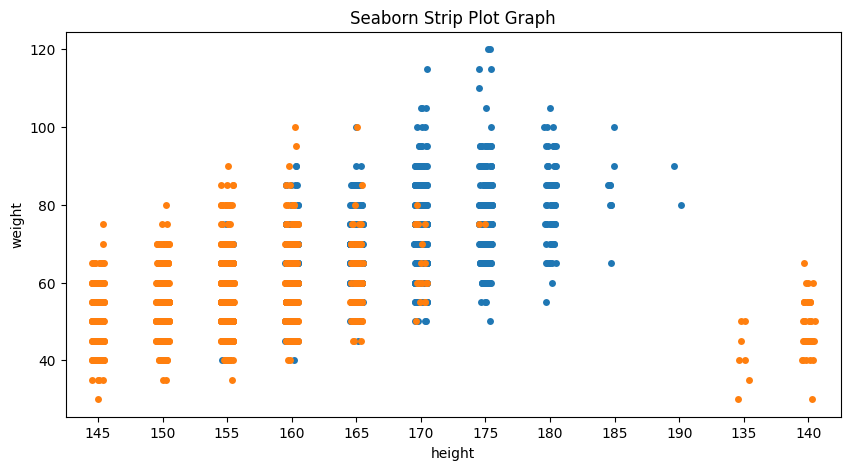

In [ ]:
plt.figure(figsize=(10, 5))
plt.title('Seaborn Strip Plot Graph')

sns.stripplot(x='height', y='weight', data=maledata)
sns.stripplot(x='height', y='weight', data=femaledata)

plt.show()

💣 문제: 필터 조건이 실제 데이터와 맞지 않았음!!   
원래는
maledata = data6.loc[data6.gender == 'M', [...]]
femaledata = data6.loc[data6.gender == 'F', [...]]

이렇게 'M'과 'F'로 되어있는데,   
실제로 열을 확인해보니 data6['gender'], 'male', 'female'로 되어있었음.  



시본 스웜 플롯 그래프 그리기: swarmplot()으로 표현

In [ ]:
# 데이터 준비하기
# 남성 및 여성 데이터 100개 가져오기
maledata100 = maledata.head(100)
femaledata100 = femaledata.head(100)
print(maledata100)
print(femaledata100)

    gender  height  weight  waist  drinking       smoking
0     Male     165      60   72.1         0   Non-smoking
2     Male     185      85   94.0         1       Smoking
3     Male     165      80   93.0         1       Smoking
6     Male     160      65   90.0         1   Non-smoking
9     Male     165      55   77.5         0   Non-smoking
..     ...     ...     ...    ...       ...           ...
212   Male     170      75   90.0         1   Non-smoking
214   Male     165      75   93.0         1  Quit-smoking
217   Male     165      65   90.0         1  Quit-smoking
220   Male     165      75   89.0         1       Smoking
221   Male     170      90   88.0         0  Quit-smoking

[100 rows x 6 columns]
     gender  height  weight  waist  drinking      smoking
1    Female     155      50   75.2         0  Non-smoking
4    Female     150      50   82.0         0  Non-smoking
5    Female     155      55   84.0         0  Non-smoking
7    Female     145      60   90.0         0  No

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 10.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


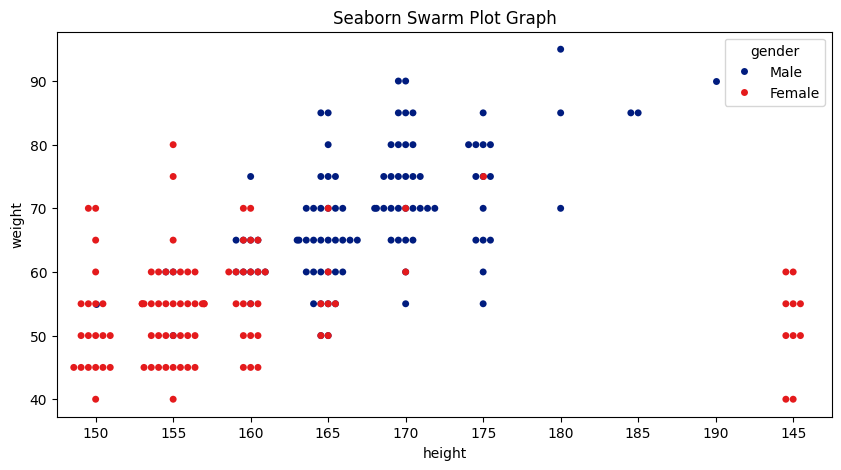

In [ ]:
# 남성과 여성의 키 및 몸무게 시본 스웜 플롯 그래프
plt.figure(figsize=(10, 5))
plt.title('Seaborn Swarm Plot Graph')

sns.swarmplot(x='height', y='weight', data=maledata100, hue='gender', palette='dark')
sns.swarmplot(x='height', y='weight', data=femaledata100, hue='gender', palette='Set1')

plt.show()


##### 5.2(4) 히스토그램

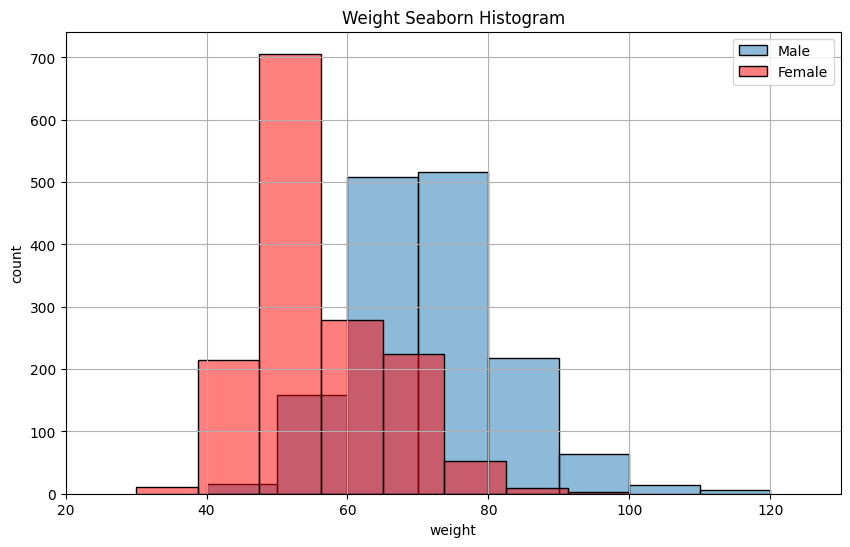

In [ ]:
plt.figure(figsize=(10, 6))

sns.histplot(maledata['weight'], bins=8, alpha=0.5, label='Male')
sns.histplot(femaledata['weight'], bins=8, alpha=0.5, label='Female', color='r')

plt.xlim(20, 130)
plt.xlabel('weight')
plt.ylabel('count')
plt.title('Weight Seaborn Histogram')
plt.legend()
plt.grid()
plt.show()


📊 허리 둘레 히스토그램 + 커널 밀도 추정 (KDE) 그래프

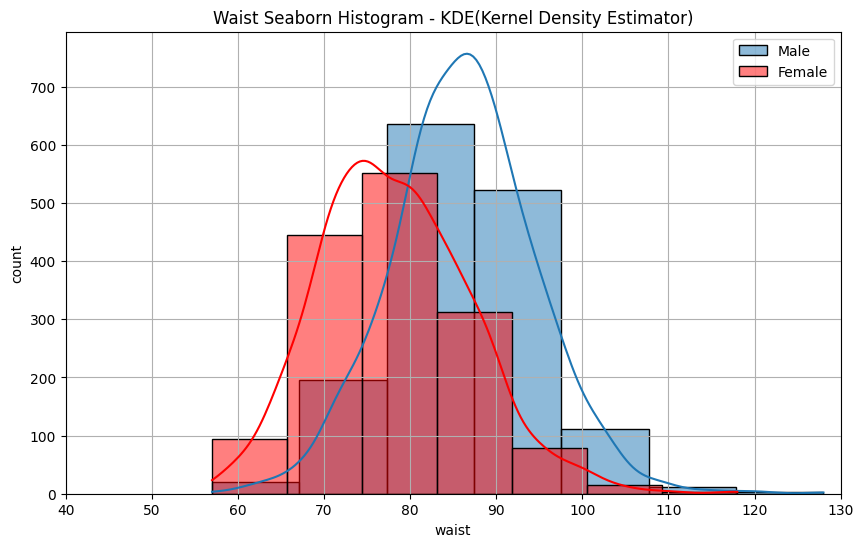

In [ ]:
plt.figure(figsize=(10, 6))

sns.histplot(maledata['waist'], bins=7, alpha=0.5, label='Male', kde=True)
sns.histplot(femaledata['waist'], bins=7, alpha=0.5, label='Female', color='r', kde=True)

plt.xlim(40, 130)
plt.xlabel('waist')
plt.ylabel('count')
plt.title('Waist Seaborn Histogram - KDE(Kernel Density Estimator)')
plt.legend()
plt.grid()
plt.show()


##### 5.2.(5) 시본 상자수염 그래프

음주 여부에 따른 체중 분포 시각화

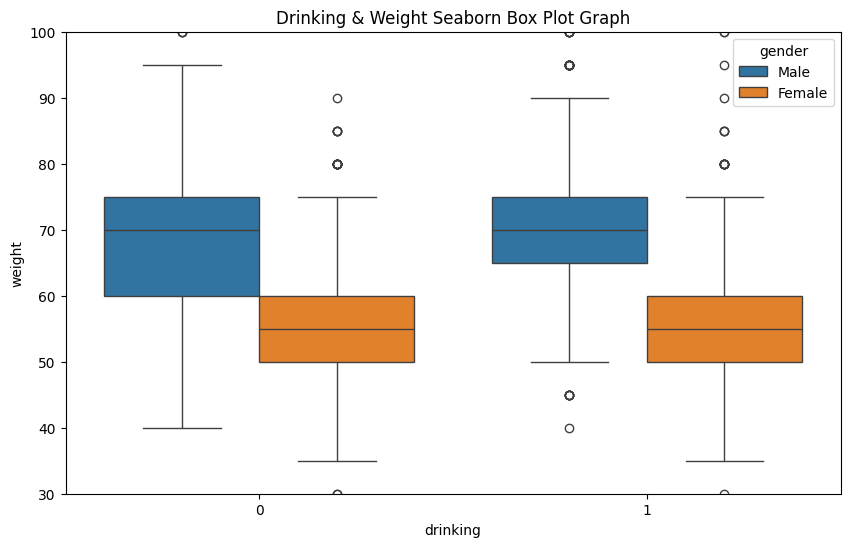

In [ ]:
plt.figure(figsize=(10, 6))
plt.title('Drinking & Weight Seaborn Box Plot Graph')

sns.boxplot(x='drinking', y='weight', hue='gender', data=data6)
plt.ylim(30, 100)

plt.show()


흡연 상태와 체중의 관계 (가로 Box Plot)

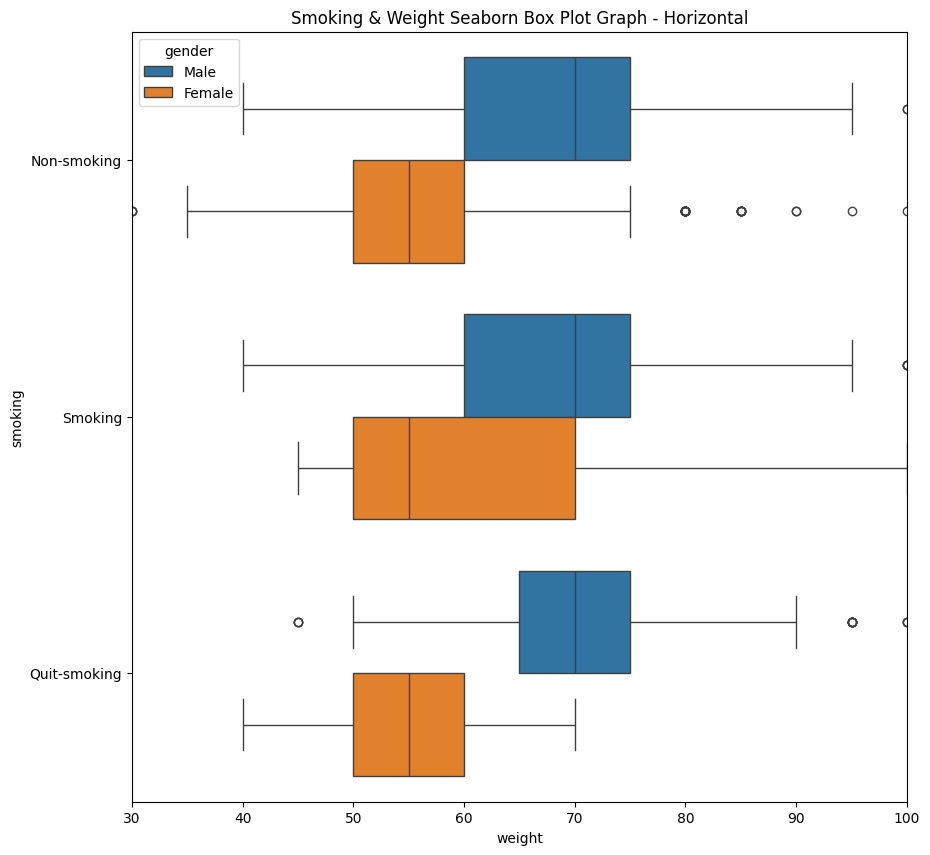

In [ ]:
plt.figure(figsize=(10, 10))
plt.title('Smoking & Weight Seaborn Box Plot Graph - Horizontal')

sns.boxplot(x='weight', y='smoking', hue='gender', data=data6, orient='h')
plt.xlim(30, 100)

plt.show()

##### 5.2.(6) 카운트 플롯(Count Plot) 그래프

성별 음주 여부 카운트 플롯 그래프

<Axes: title={'center': 'Drinking Count Plot Graph'}, xlabel='drinking', ylabel='count'>

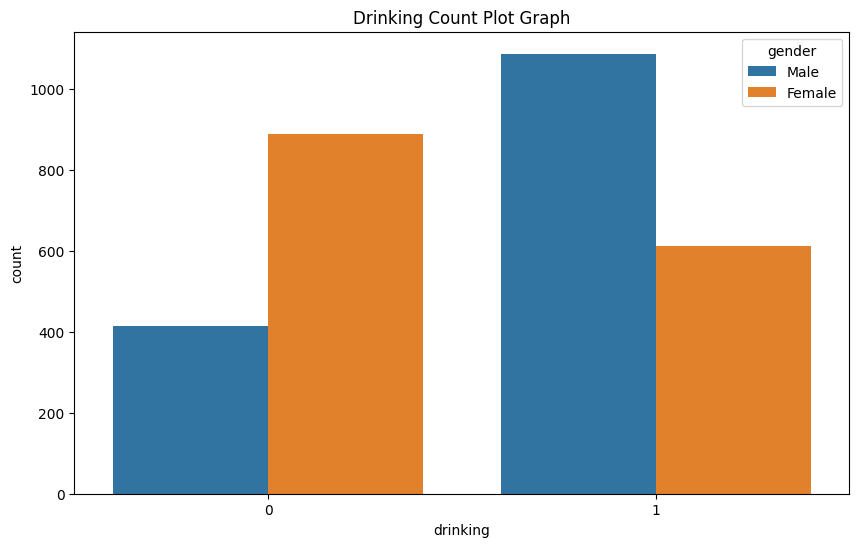

In [ ]:
plt.figure(figsize=(10, 6))
plt.title('Drinking Count Plot Graph')

sns.countplot(x='drinking', hue='gender', data=data6)


성별 흡연 상태 가로 카운트 플롯 그래프

<Axes: title={'center': 'Smoking Count Plot Graph - Horizontal'}, xlabel='count', ylabel='smoking'>

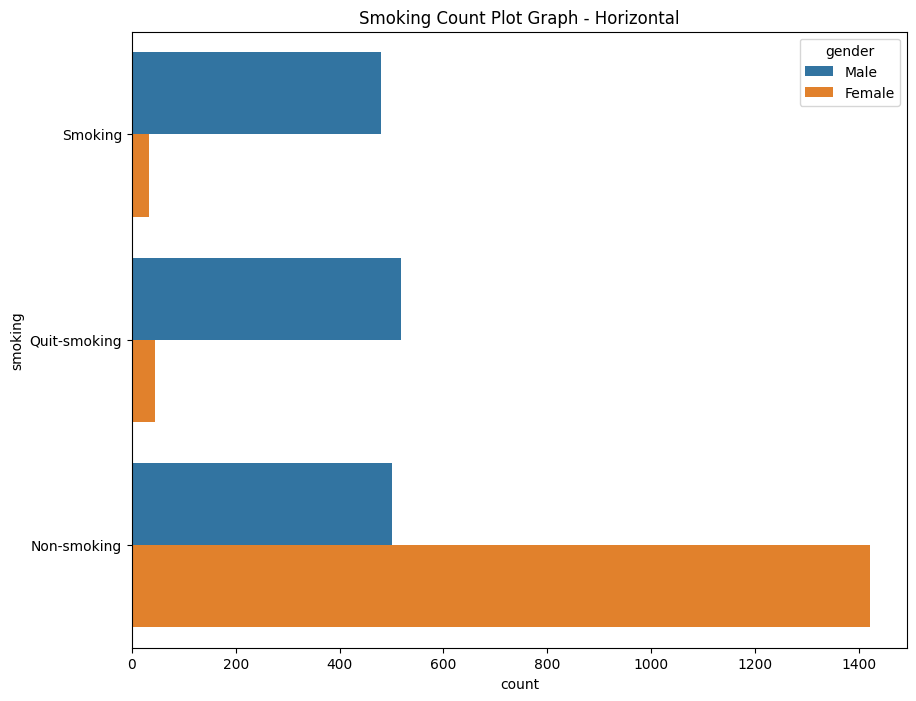

In [ ]:
plt.figure(figsize=(10, 8))
plt.title('Smoking Count Plot Graph - Horizontal')

sns.countplot(
    y='smoking',
    hue='gender',
    data=data6,
    order=['Smoking', 'Quit-smoking', 'Non-smoking']
)


##### 5.2.(7) 🎻 바이올린 플롯(Violin Plot) 그래프

성별 & 음주 여부에 따른 체중 분포

<Axes: title={'center': 'Gender Weight Violin Plot Graph - Drinking category'}, xlabel='gender', ylabel='weight'>

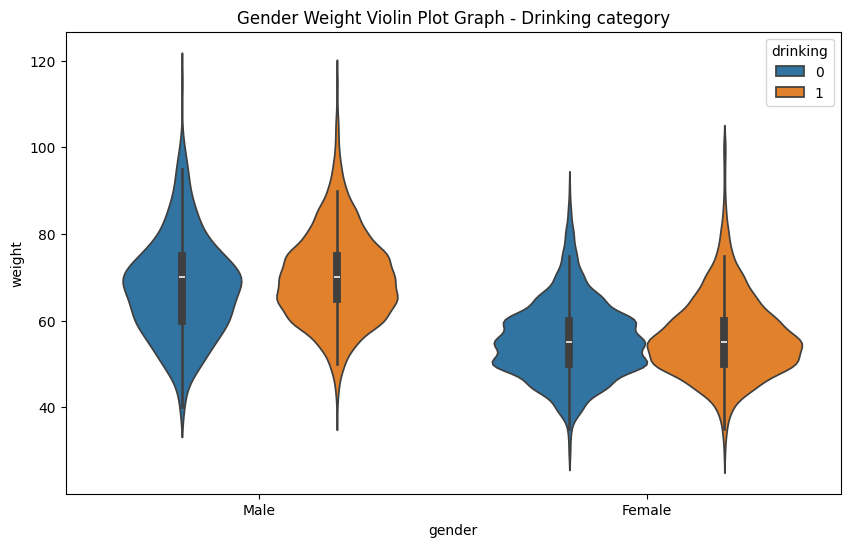

In [ ]:
plt.figure(figsize=(10, 6))
plt.title('Gender Weight Violin Plot Graph - Drinking category')

sns.violinplot(
    x='gender',
    y='weight',
    hue='drinking',
    data=data6[data6.weight < 120]
)


<Axes: title={'center': 'Gender Waist Violin Plot Graph - Drinking category'}, xlabel='waist', ylabel='gender'>

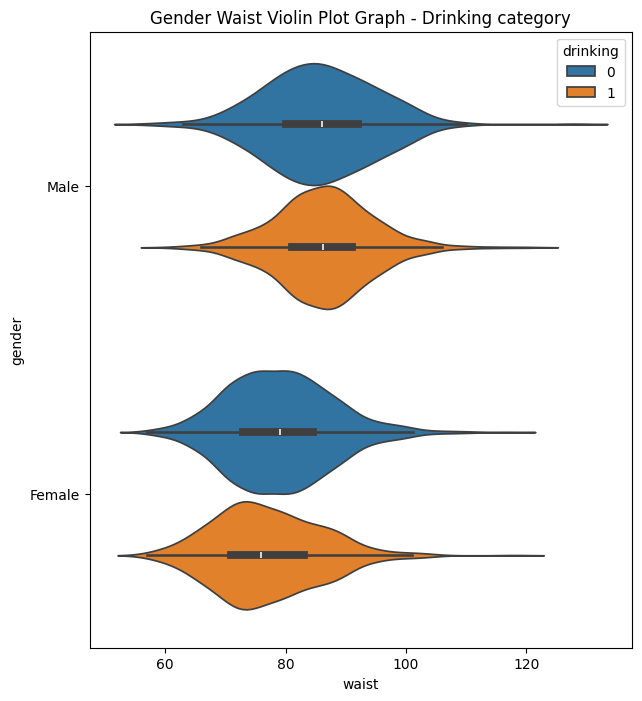

In [ ]:
plt.figure(figsize=(7, 8))
plt.title('Gender Waist Violin Plot Graph - Drinking category')

sns.violinplot(
    y='gender',
    x='waist',
    hue='drinking',
    data=data6[data6.waist < 150]
)


##### 5.2.(8) 시본 히트맵 그래프

In [ ]:
# 1. 데이터 준비하기
# 데이터셋에서 필요한 열만 선택
data3 = data.loc[:, ['gender', 'drinking', 'smoking']]
data8 = data.loc[:, ['gender', 'weight', 'waist', 'drinking', 'smoking', 'cholesterol', 'HDL', 'LDL']]


<Axes: title={'center': '3x3 Heat Map Graph'}>

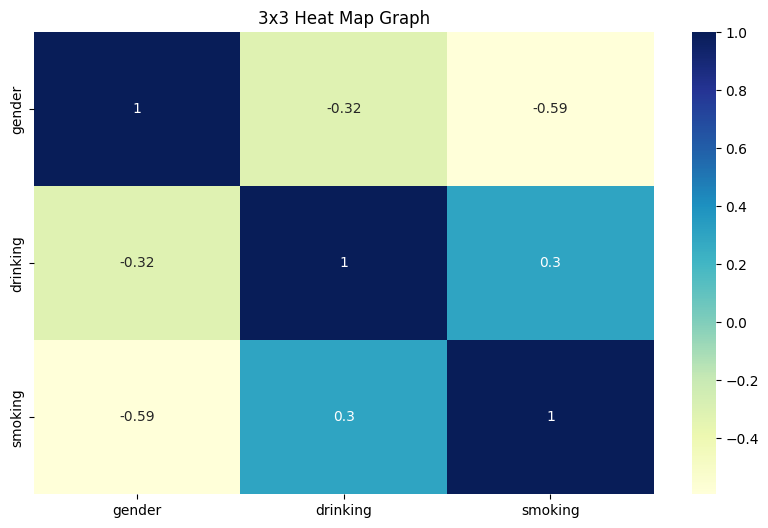

In [ ]:
# 3x3 히트맵 그리기
plt.figure(figsize=(10, 6))
plt.title('3x3 Heat Map Graph')

correlation_data3 = data3.corr() # corr()
sns.heatmap(correlation_data3, annot=True, cmap='YlGnBu')


히트맵 보면 숫자가 있는데 1이면 관계가 많은거고 -는 관계가 없다는 듯임.   
corr() <- 상관관계를 알려주는 함수   
annot=True는 수치적인 값을 표현할건지 말건지 물어보는 것   
근데 색깔로 표현가능하긴함

8x8 히트맵 그리기

<Axes: title={'center': '8x8 Heat Map Graph'}>

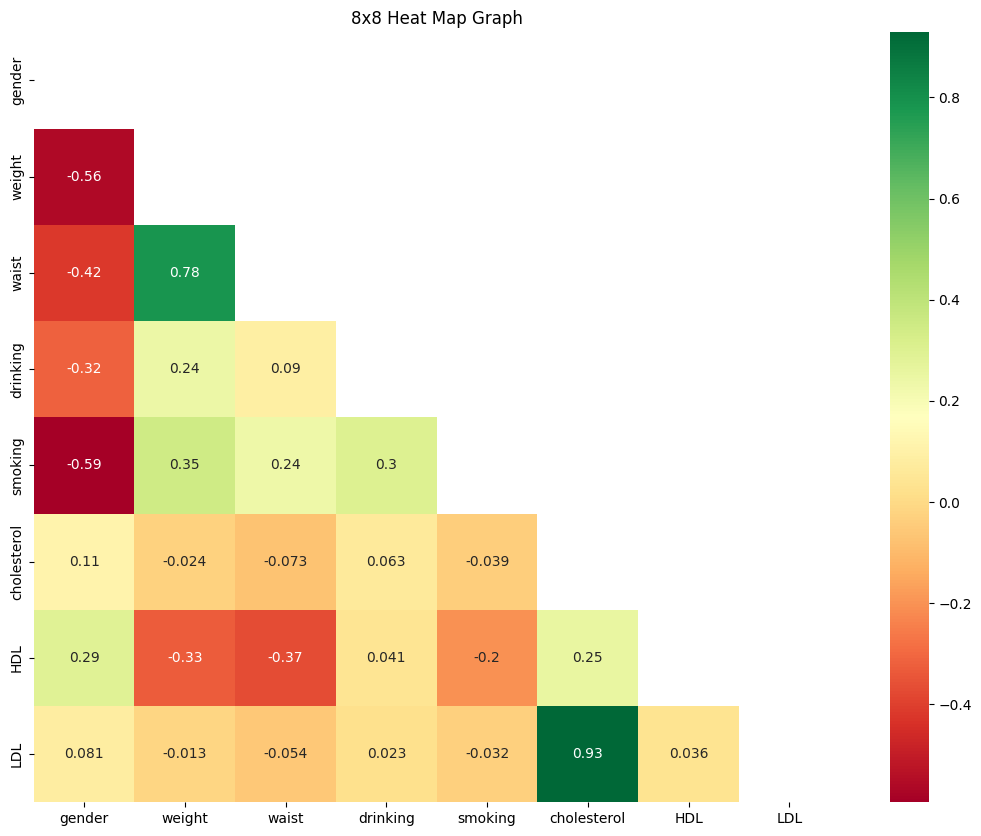

In [ ]:
plt.figure(figsize=(13, 10))
plt.title('8x8 Heat Map Graph')

correlation_data8 = data8.corr()
upp_mat = np.triu(correlation_data8)

sns.heatmap(correlation_data8, annot=True, cmap='RdYlGn', mask=upp_mat)


##### 5.2.(9) 다중 플롯 그리드 그래프

열 기준으로 나눈 패싯 그리드 히스토그램

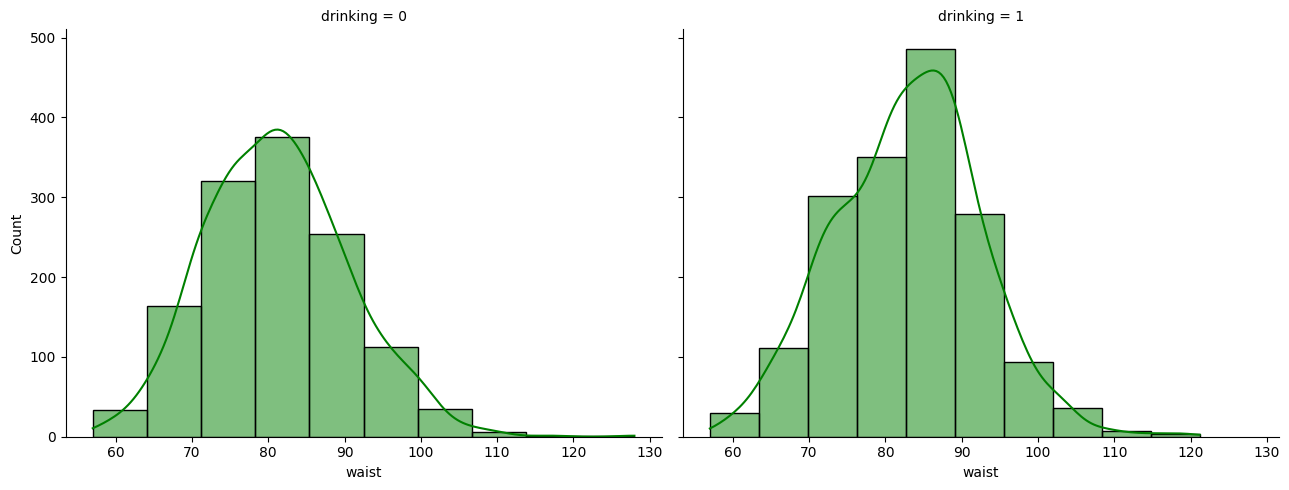

In [ ]:
fg = sns.FacetGrid(data6, col='drinking', height=5, aspect=1.3) # aspect는 가로세로 비율
fg.map(sns.histplot, 'waist', bins=10, color='g', kde=True)

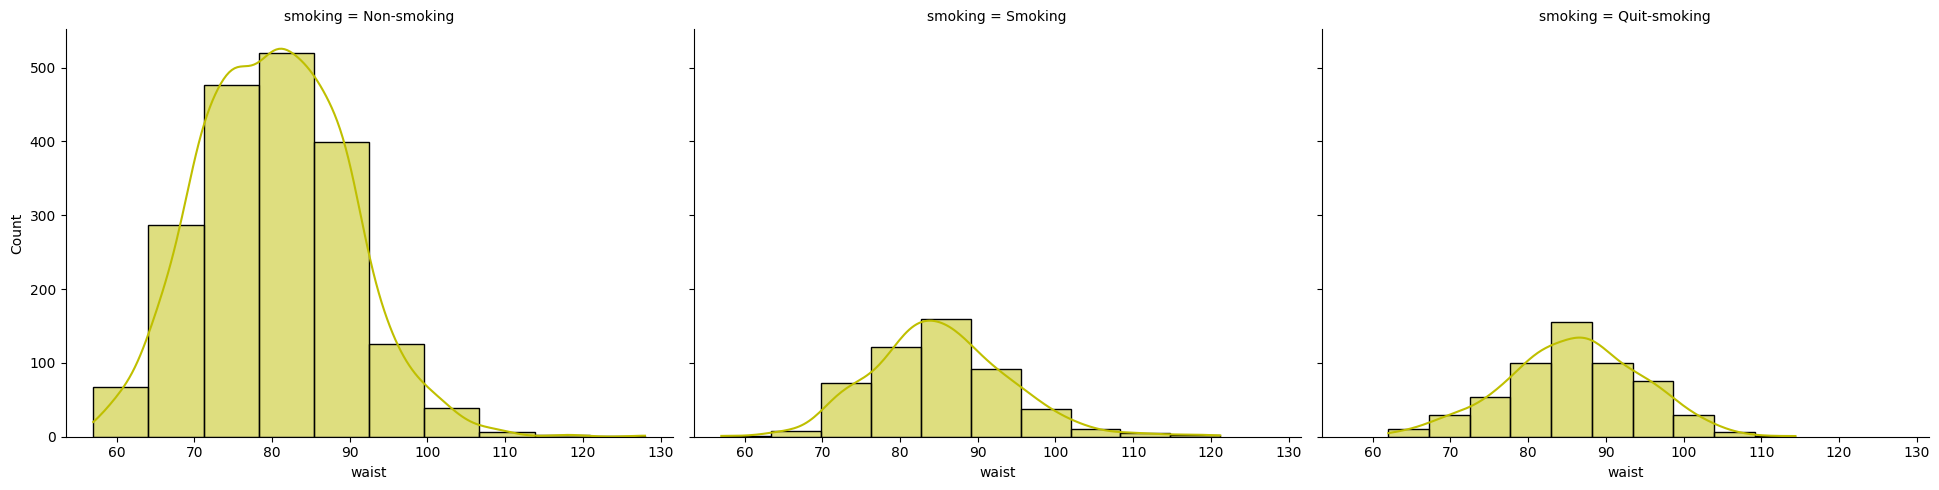

In [ ]:
# col='' 이 부분에 drinking말고 smoking으로 나누고 색깔도 바꿔보기

fg = sns.FacetGrid(data6, col='smoking', height=5, aspect=1.3) # aspect는 가로세로 비율
fg.map(sns.histplot, 'waist', bins=10, color='y', kde=True)

행과 열 기준으로 나눈 패싯 그리드 그래프 그리기

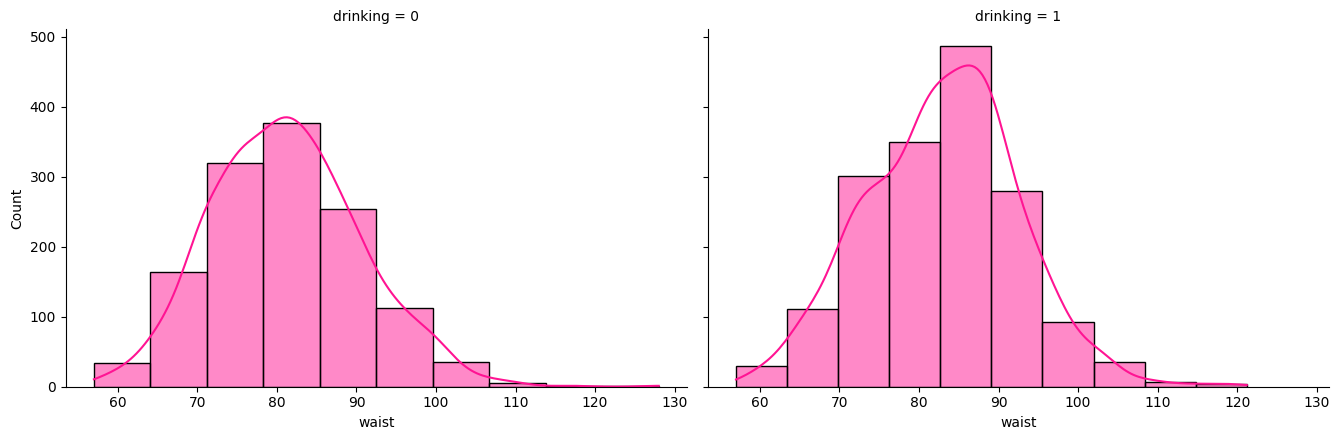

In [ ]:
fg = sns.FacetGrid(data6, col='drinking', height=4.5, aspect=1.5)
fg.map(sns.histplot, 'waist', bins=10, color='deeppink', kde=True)

페어 플롯(Pair Plot) 그래프   
얘는 수치데이터만 표현가능함!

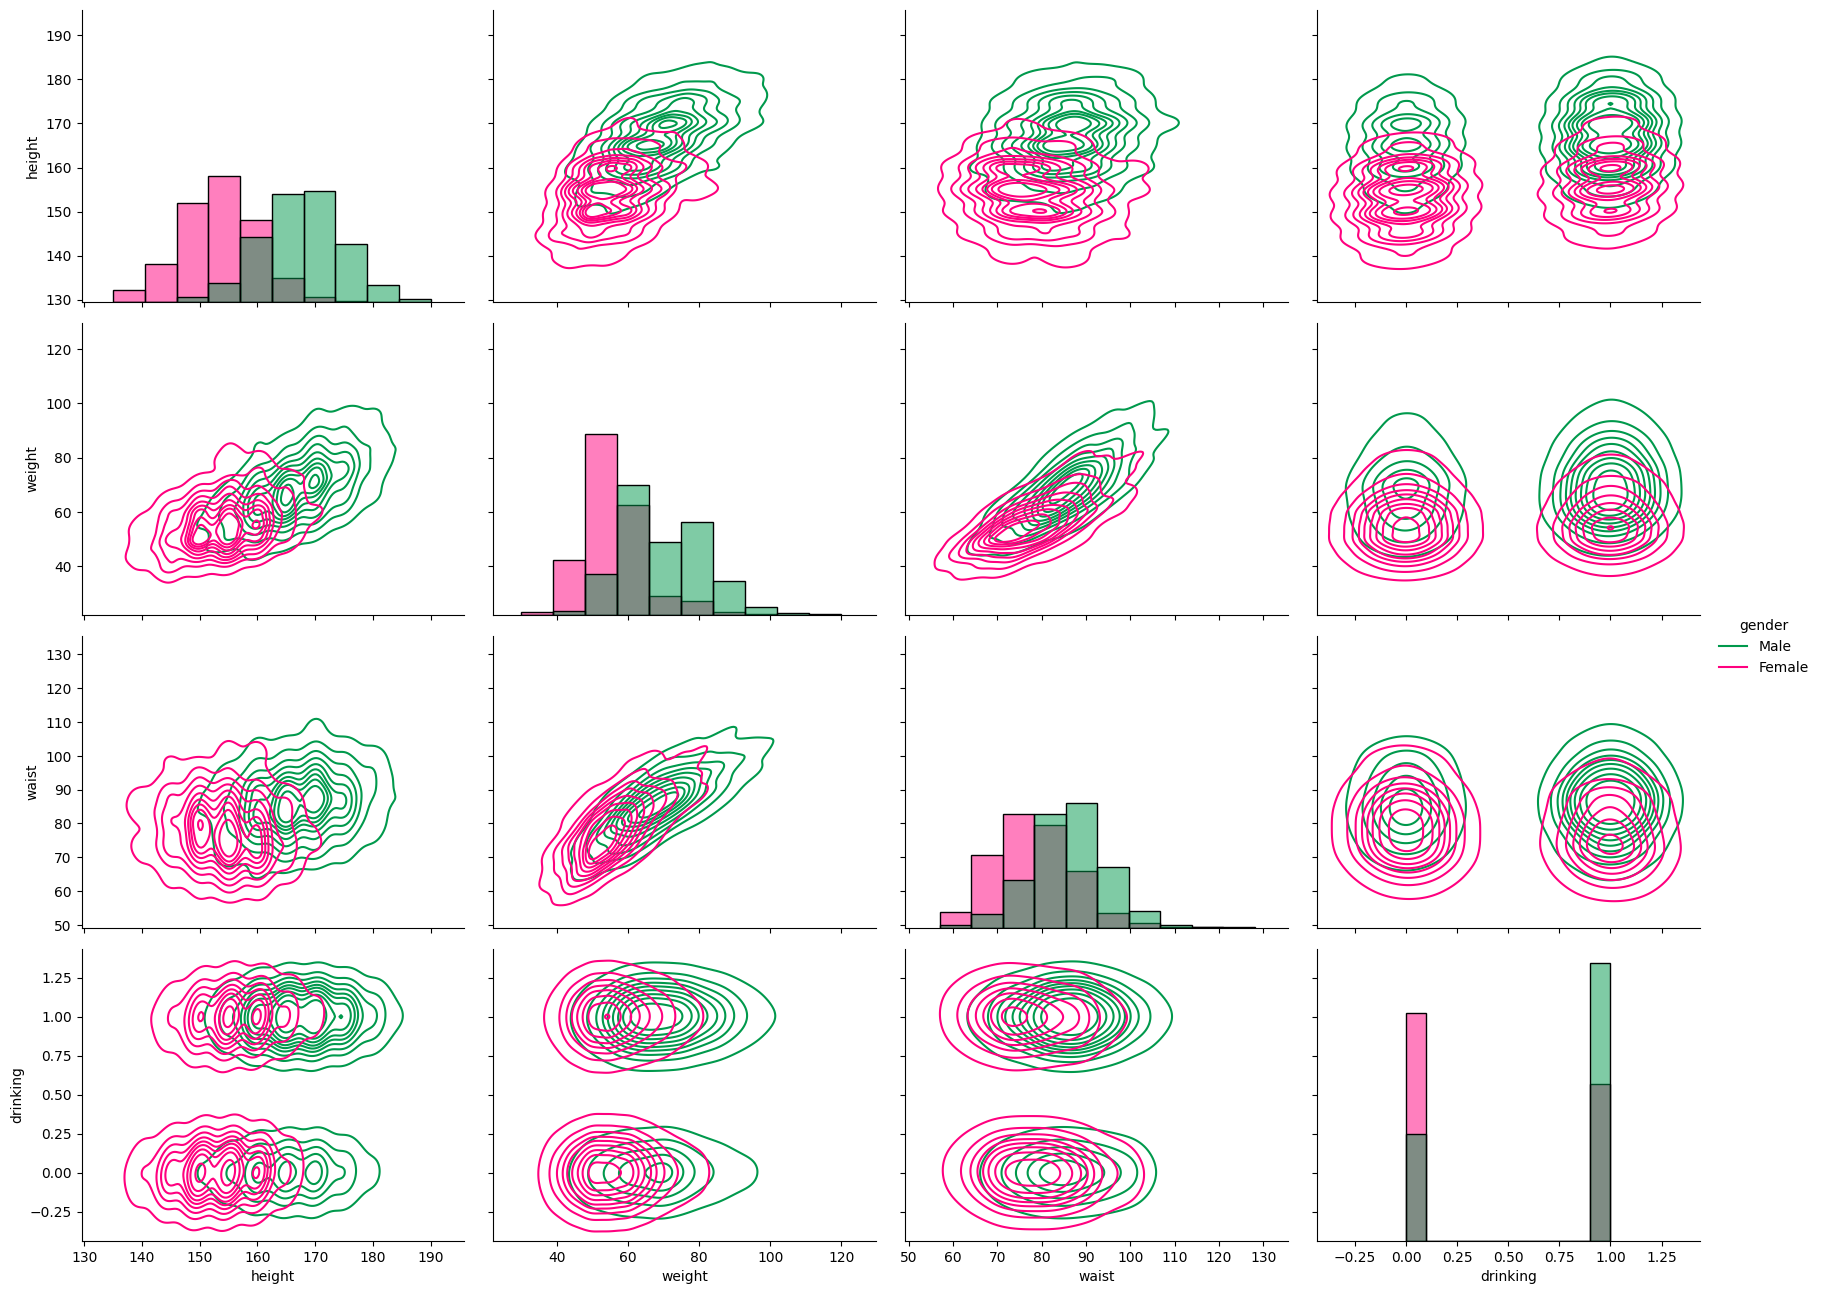

In [ ]:
color = ['#00994C', '#FF007F']

pp = sns.PairGrid(data6, hue='gender', palette=color, height=3.3, aspect=1.3)
pp.map_diag(sns.histplot, bins=10)
pp.map_offdiag(sns.kdeplot)
pp.add_legend()
